##**Data Overview**

In [188]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# Load the dataset, specifying the raw file URL
train = pd.read_csv('https://raw.githubusercontent.com/TonyNguyenK1/Capston-Project-820/main/Datasets/loan_sanction_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/TonyNguyenK1/Capston-Project-820/main/Datasets/loan_sanction_test.csv')

In [190]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [191]:
train.shape

(614, 13)

We have 614 rows and 13 columns in train dataset.

In [192]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [193]:
test.shape

(367, 12)

We have 367 rows and 12 columns in train dataset.

In [194]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## **Initial Analysis**

### **Univariate Analysis**

* Income: Both applicant and co-applicant incomes show significant variation with some high-income outliers. This suggests the need for scaling and possibly transforming these variables.

* Loan Amount and Term: The loan amount also varies widely, indicating that some applicants request significantly larger loans. The loan term is mostly consistent, with 360 months being a common value.

* Categorical Variables: There are clear trends in the categorical variables, such as more male applicants, more married applicants, and a higher number of graduates. The approval rate is higher for those with a credit history.


#### **Summary Statistics for Numerical Features**

In [195]:
# Get summary statistics for numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
numerical_summary = train[numerical_features].describe() # Use 'train' instead of 'train_df'
numerical_summary


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


#### **Distribution Plots for Numerical Features**

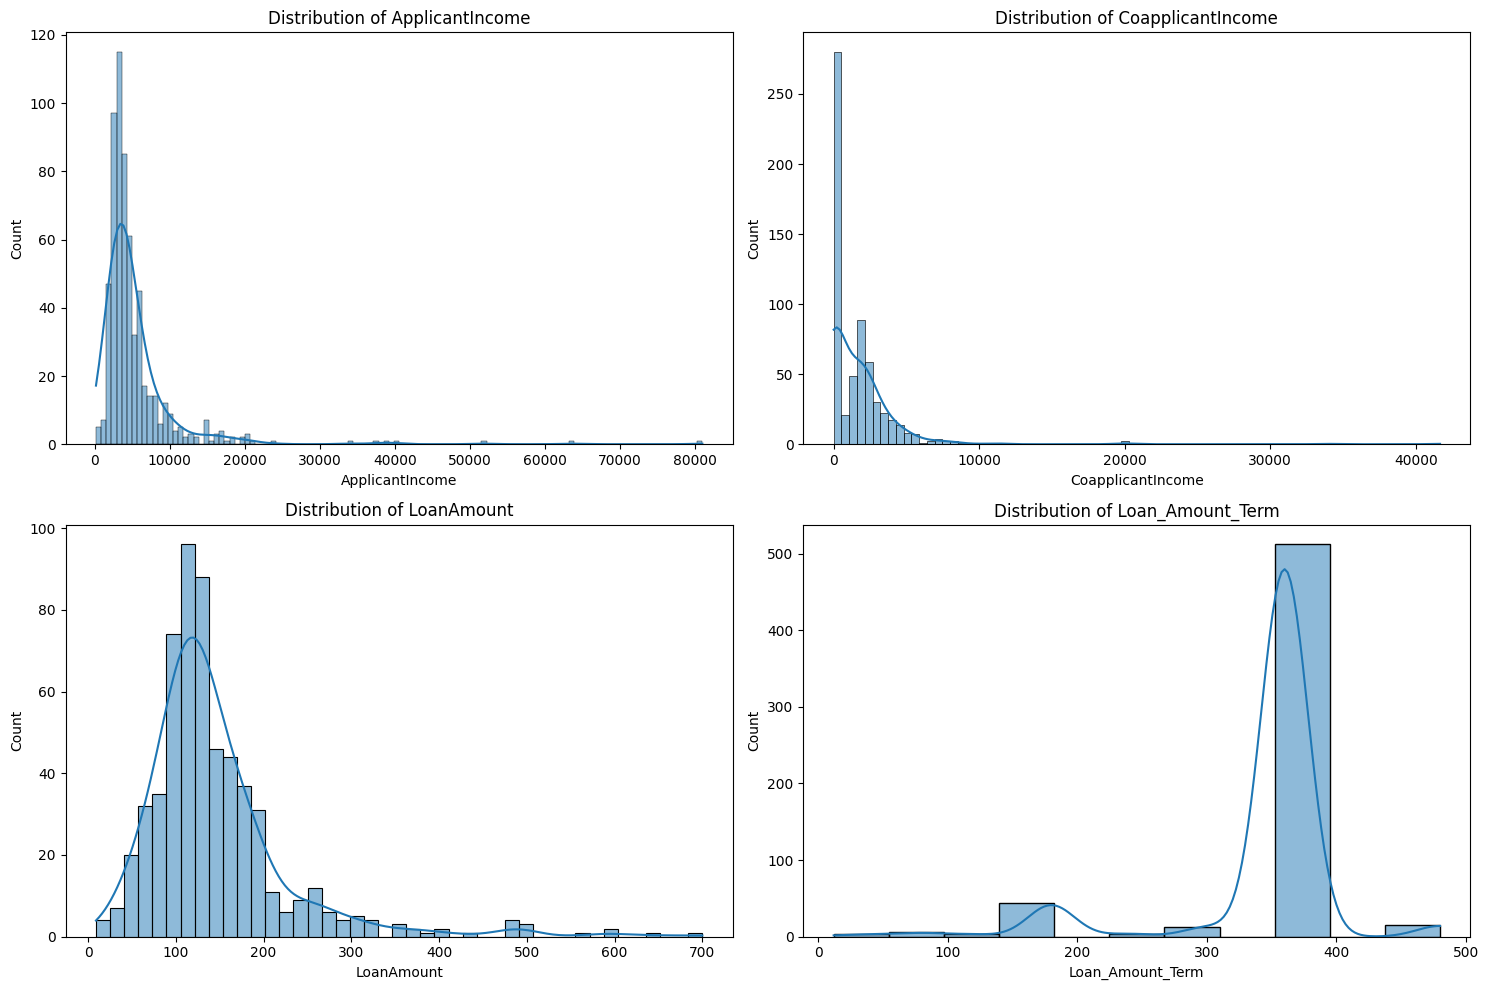

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

*   Applicant Income: The distribution is right-skewed with a few high-income outliers.

*   Co-applicant Income: The distribution is also right-skewed with many zero values indicating no co-applicant.

*   Loan Amount: The distribution is right-skewed with higher values extending the tail.

*   Loan Amount Term: The distribution shows common values like 360 months representing standard loan terms


#### **Frequency Counts for Categorical Features**

In [197]:
# List of categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

# Get frequency counts for categorical features
for feature in categorical_features:
    print(f'\n{feature}:\n{train[feature].value_counts()}')



Gender:
Gender
Male      489
Female    112
Name: count, dtype: int64

Married:
Married
Yes    398
No     213
Name: count, dtype: int64

Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Education:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Credit_History:
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

Property_Area:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Loan_Status:
Loan_Status
Y    422
N    192
Name: count, dtype: int64


#### **Bar Plots for Categorical Features**

<ipython-input-198-9391739e56ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train, palette="Set2")
<ipython-input-198-9391739e56ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train, palette="Set2")
<ipython-input-198-9391739e56ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train, palette="Set2")
<ipython-input-198-9391739e56ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

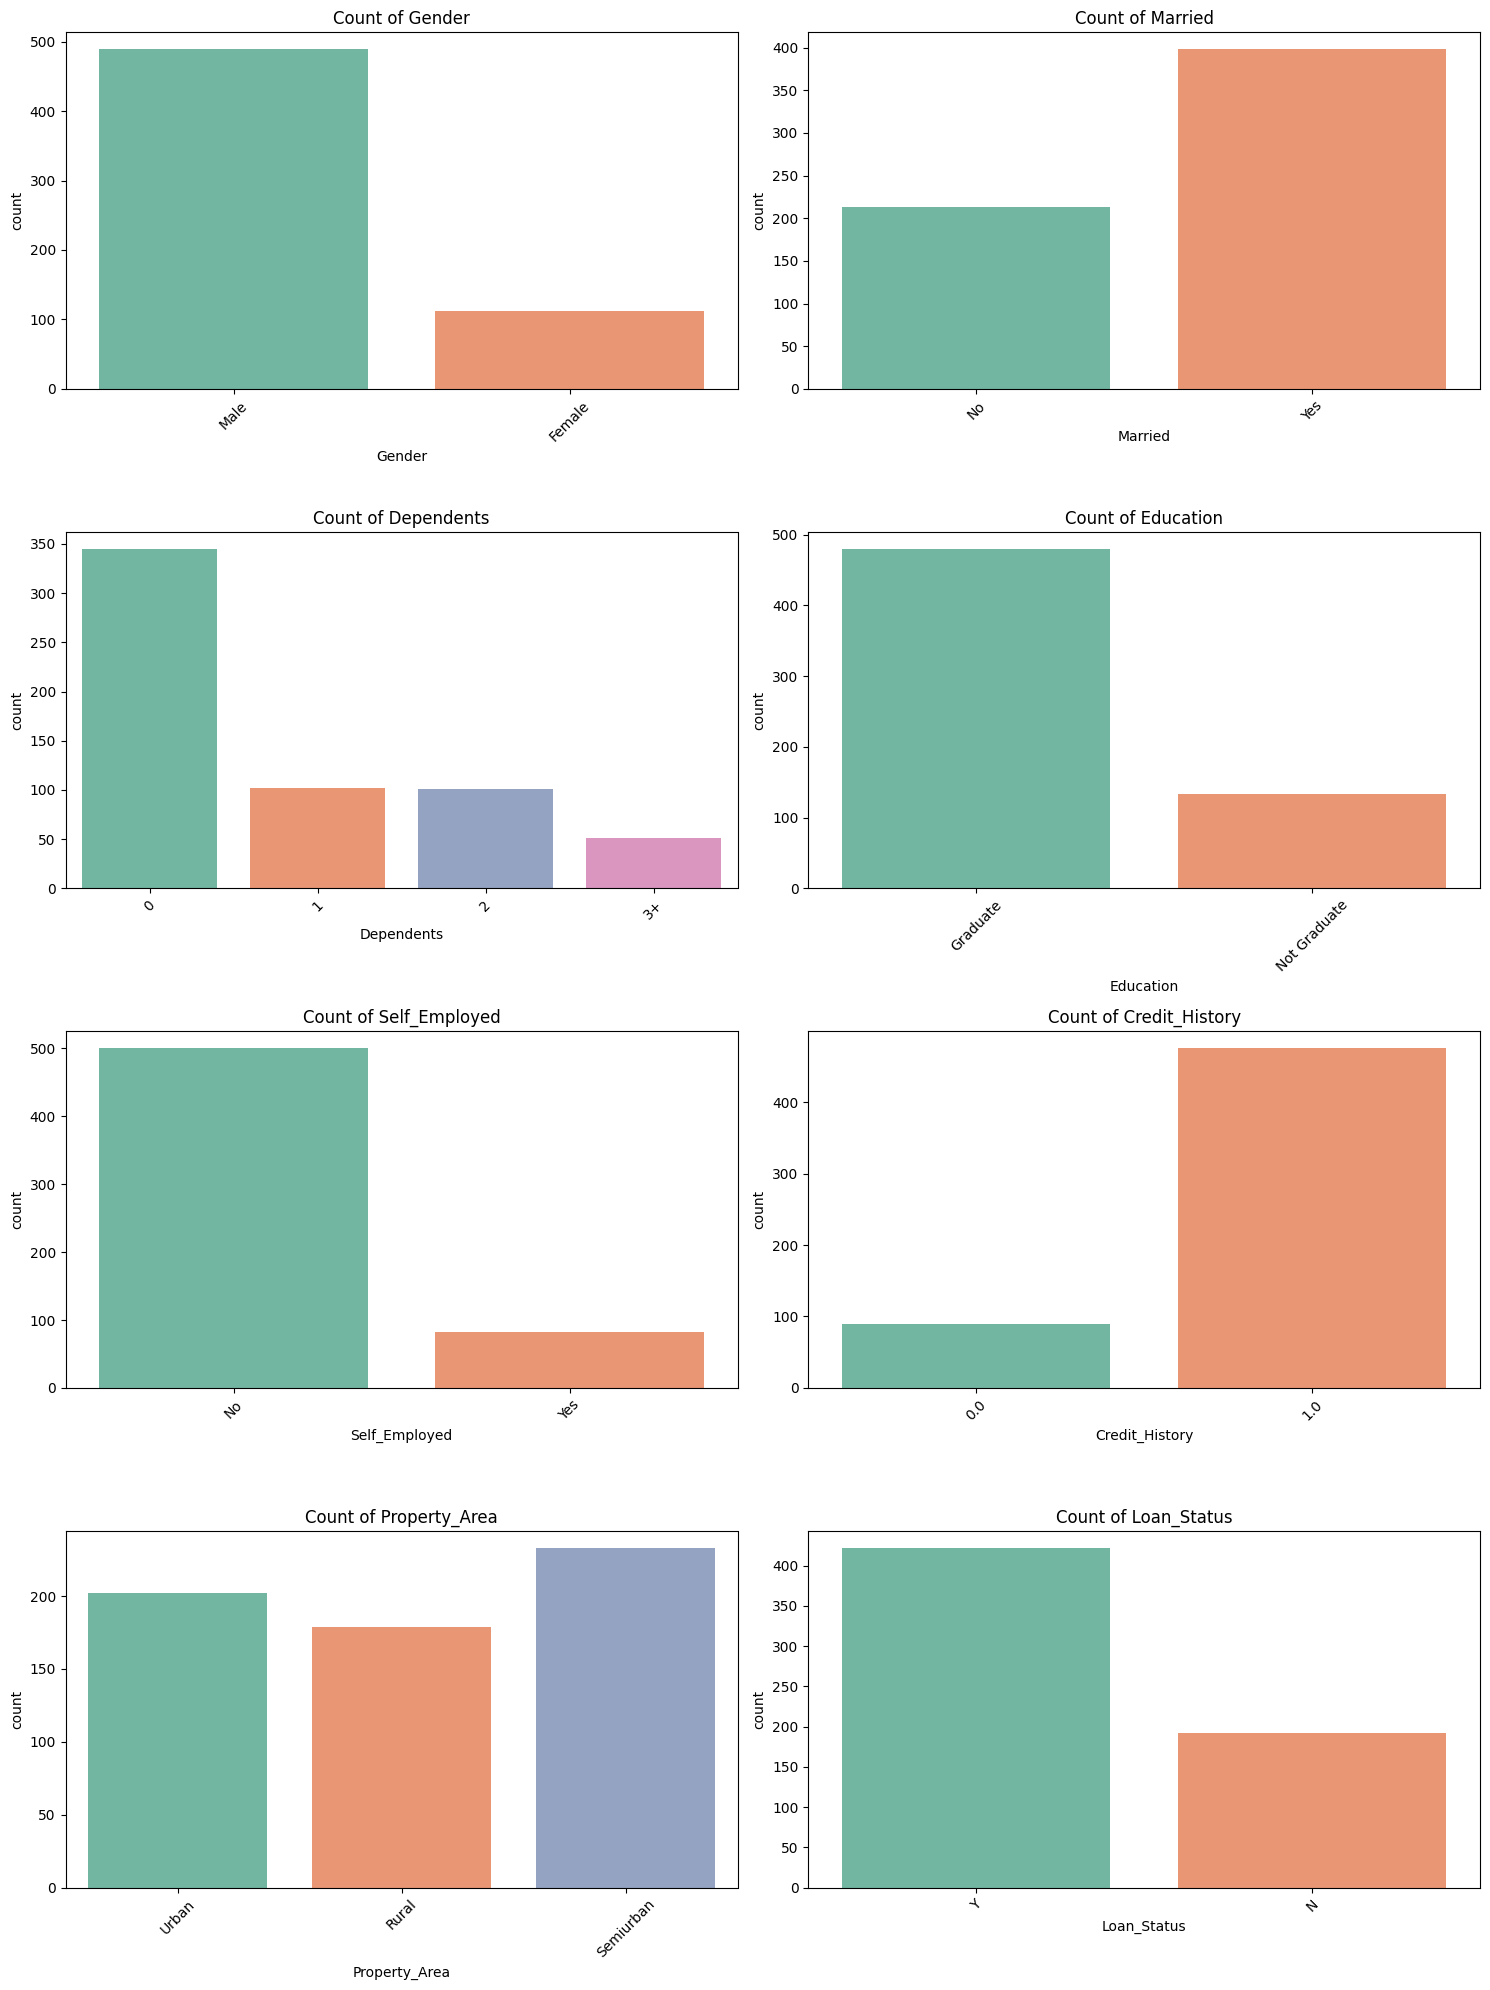

In [198]:
# Plot bar plots for categorical features
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=feature, data=train, palette="Set2")
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*   Gender: Majority of applicants are male.

*   Dependents: Most applicants have zero dependents

*   Married: More applicants are married than unmarried.

*   Education: Majority of applicants are graduates.

*   Self_Employed: Most applicants are not self-employed.

*   Credit History: Majority of applicants have a credit history.

*   Property Area: Semi urban properties are the most common.

*   Loan Status: More loans are approved than rejected.


### **Bivariate Analysis**

*   Income and Loan Amount: Higher applicant and co-applicant incomes are associated with higher loan amounts and higher approval rates.

*   Credit History: Presence of credit history significantly increases the likelihood of loan approval.
Demographic Factors: Married, male, graduate, and non-self-employed applicants are more likely to be approved.

*   Dependents: Fewer dependents correlate with higher approval rates.

*   Property Area: Semiurban areas have the highest approval rates, suggesting possibly lower risk associated with these locations.


#### **Bivariate Analysis for Numerical Features vs. Loan Status**

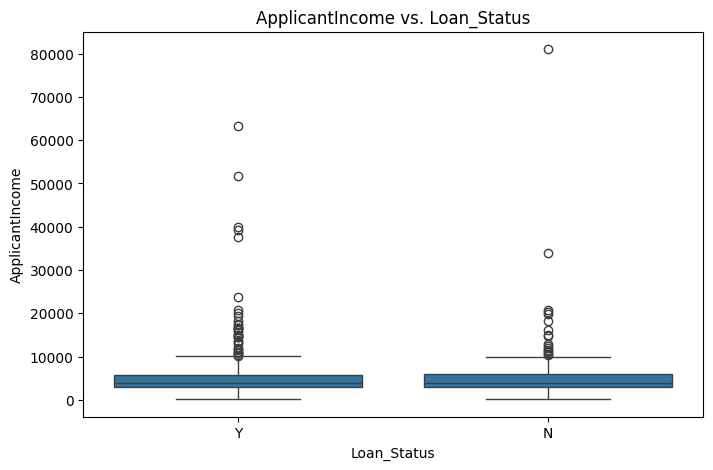

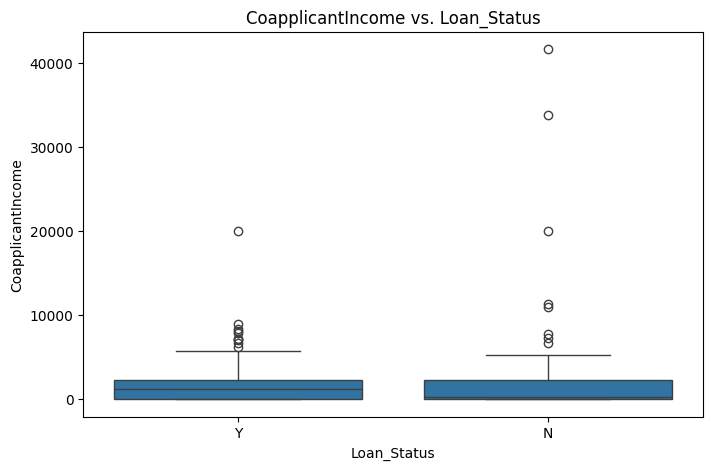

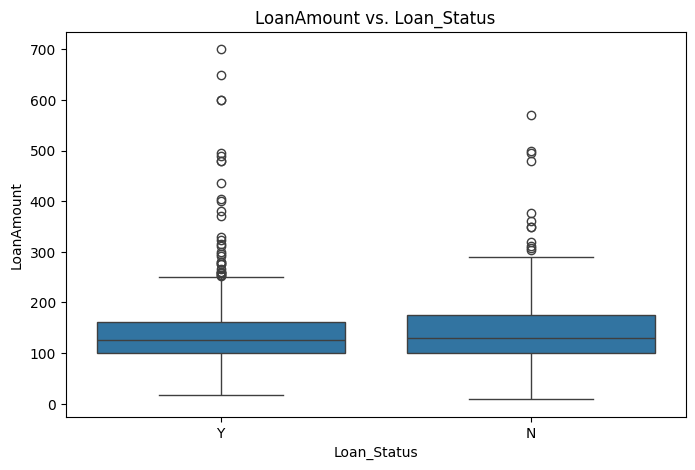

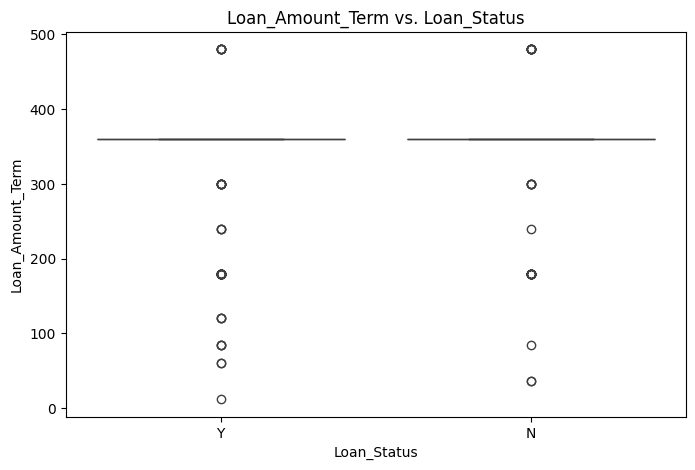

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot bivariate analysis for numerical features
def plot_bivariate_numerical(df, feature):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Loan_Status', y=feature, data=df)
    plt.title(f'{feature} vs. Loan_Status')
    plt.show()

# Numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Plot bivariate analysis for numerical features
for feature in numerical_features:
    plot_bivariate_numerical(train, feature)


*   Applicant Income vs. Loan Status: The box plot shows that the median applicant income is slightly higher for approved loans compared to rejected loans. However, there are significant outliers in both groups.

*  Co-applicant Income vs. Loan Status: The median co-applicant income is higher for approved loans. Zero incomes are more common among rejected loans.

*   Loan Amount vs. Loan Status: Approved loans tend to have a higher median loan amount compared to rejected loans, with fewer extreme outliers in the rejected group.

*   Loan Amount Term vs. Loan Status: The loan amount term does not show a significant difference between approved and rejected loans, with 360 months being the most common term in both cases.

#### **Bivariate Analysis for Categorical Features vs. Loan Status**

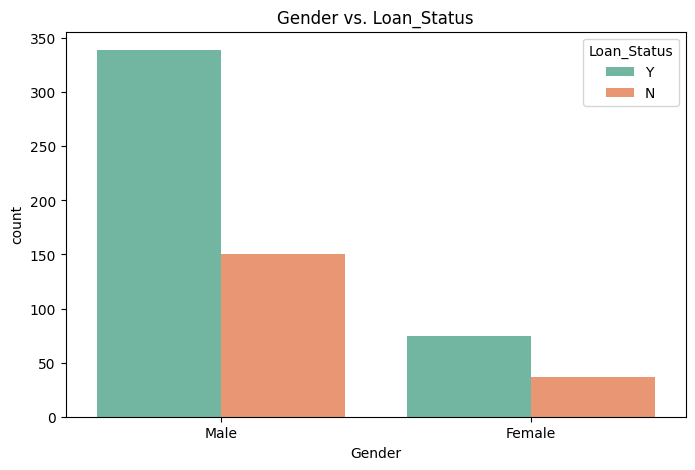

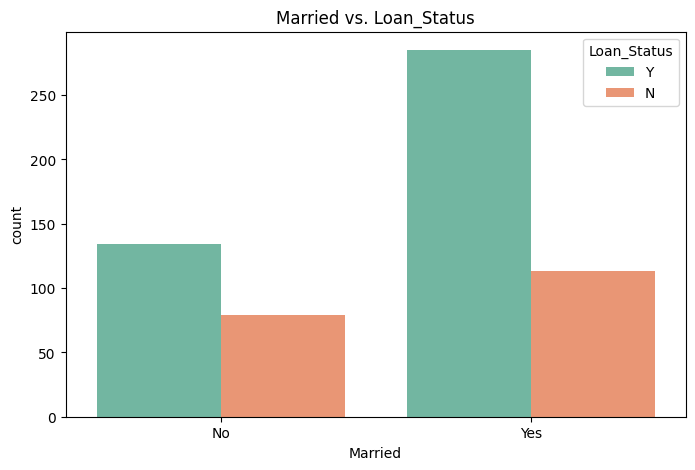

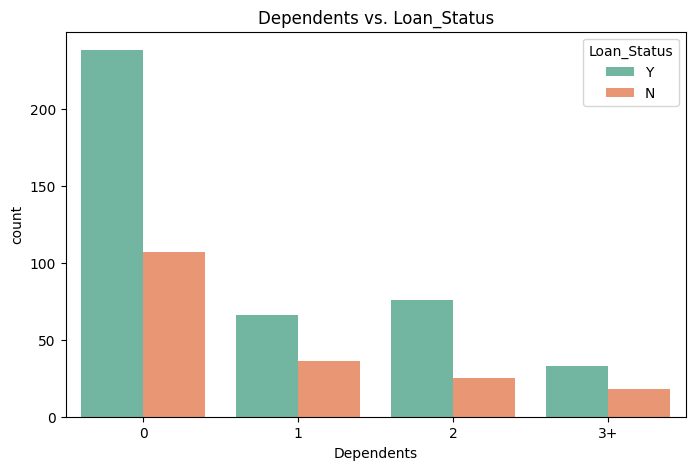

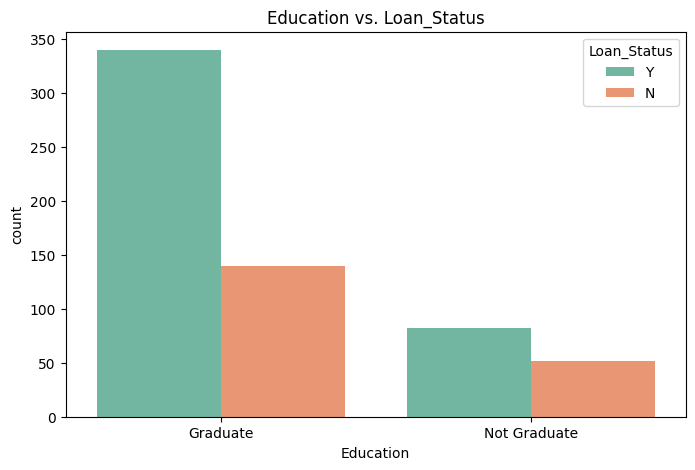

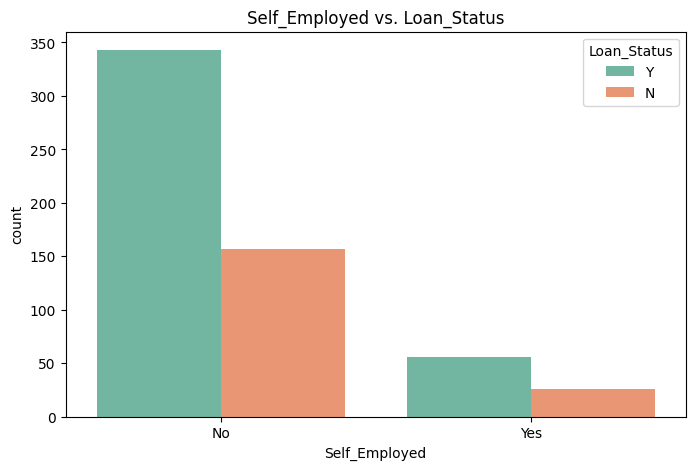

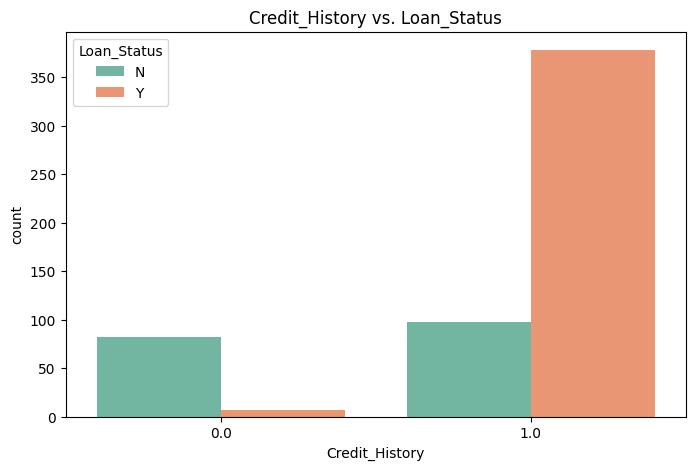

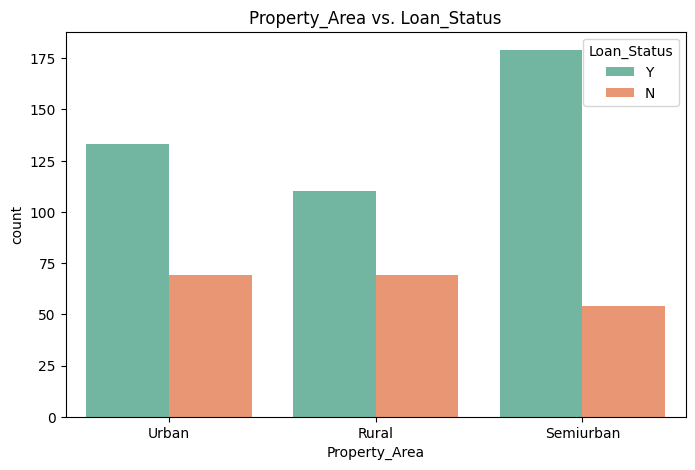

In [200]:
# Function to plot bivariate analysis for categorical features
def plot_bivariate_categorical(df, feature):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='Loan_Status', data=df, palette="Set2")
    plt.title(f'{feature} vs. Loan_Status')
    plt.show()

# Categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# Plot bivariate analysis for categorical features
for feature in categorical_features:
    plot_bivariate_categorical(train, feature)


*   Male applicants are approved more frequently than female applicants

*   Semiurban properties have the highest approval rates, followed by urban and rural properties.

*   Applicants with a credit history are significantly more likely to be approved compared to those without a credit history

*   Non-self-employed applicants have a higher approval rate compared to self-employed applicants

*   Graduates have a higher approval rate compared to non-graduates

*   Applicants with no dependents are approved more frequently. The approval rate decreases as the number of dependents increases

*   Married applicants have a higher approval rate compared to unmarried applicants


#### **Correlation Analysis for Numerical Features**

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   

                   Loan_Amount_Term  
ApplicantIncome           -0.045306  
CoapplicantIncome         -0.059878  
LoanAmount                 0.039447  
Loan_Amount_Term           1.000000  


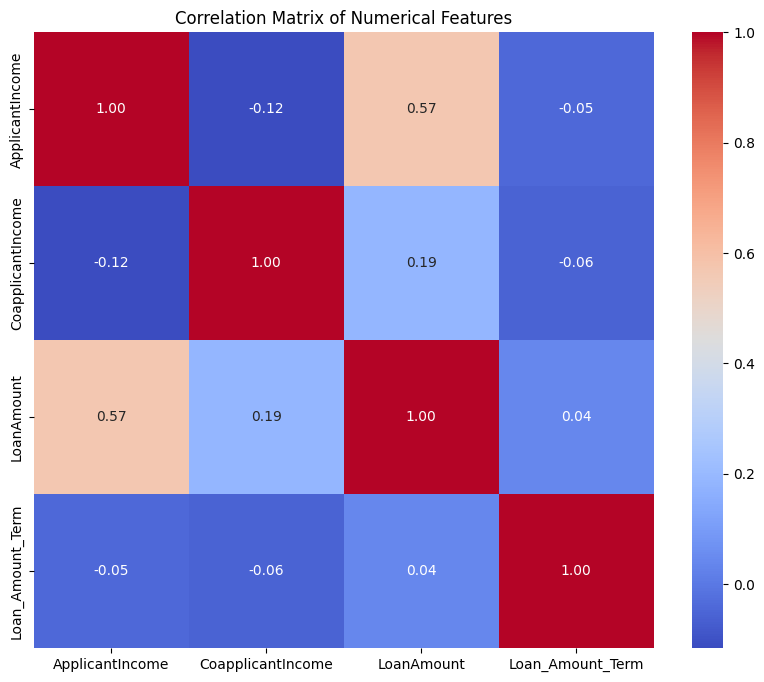

In [201]:
# Calculate the correlation matrix for numerical features
correlation_matrix = train[numerical_features].corr()
print(correlation_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The correlation matrix for numerical features shows the following key points:
*   Applicant Income and Loan Amount: There is a moderate positive correlation (0.57) between applicant income and loan amount, indicating that higher income applicants tend to request higher loan amounts.

*   Coapplicant Income and Loan Amount: There is a weaker positive correlation (0.19) between coapplicant income and loan amount.

*   Applicant Income and Coapplicant Income: There is a slight negative correlation (-0.12) between applicant income and coapplicant income, suggesting that often, when one is high, the other tends to be lower.

*   Loan Amount Term: There is very little correlation between loan amount term and other numerical features.


## **Data Preprocessing**

### **Missing Value Imputation**

Listing out feature-wise count of missing value

In [202]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in the **'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term'**, and **'Credit_History'** features. We will treat the missing values in all the features one by one using the following methods:

*   For numerical variables: Imputation using mean or median
*   For categorical variables: Imputation using mode

**Gender, Married, Dependents, Credit_History**, and **Self_Employed**:

These features have very few missing values, so we will fill them using the mode of the respective features.

In [203]:
# Imputation for categorical variables using mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


**Loan_Amount** and **Loan_Amount_Term**:

We will use median imputation for LoanAmount and mode imputation for Loan_Amount_Term.

In [204]:
# Imputation for numerical variables using median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Check whether all the missing values are filled in the dataset.

In [205]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the missing values have been addressed in the training dataset. Let's apply the same method to fill in the missing values in the test dataset as well.

In [206]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

In [207]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### **Handling Outliers**

As we saw earlier in Univariate Analysis. Outliers can skew the results and reduce the accuracy of your models. We will identify and handle outliers in the numerical features of the dataset, particularly **ApplicantIncome, CoapplicantIncome, and LoanAmount.**

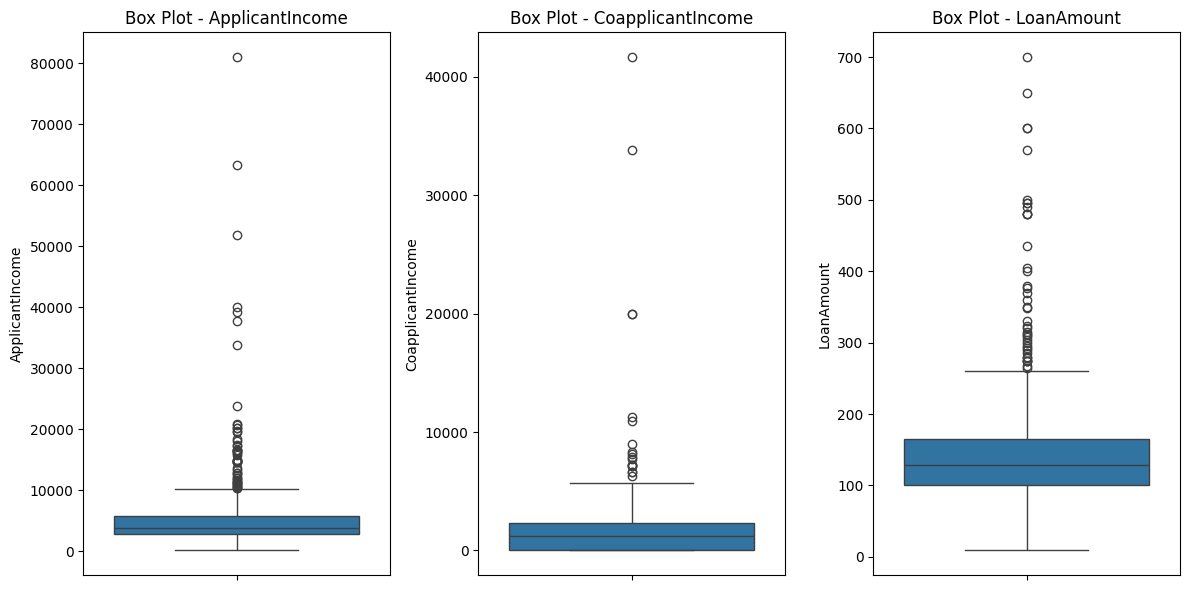

In [208]:
plt.figure(figsize=(12, 6))

# Box plot for ApplicantIncome
plt.subplot(1, 3, 1)
sns.boxplot(y=train['ApplicantIncome'])
plt.title('Box Plot - ApplicantIncome')

# Box plot for CoapplicantIncome
plt.subplot(1, 3, 2)
sns.boxplot(y=train['CoapplicantIncome'])
plt.title('Box Plot - CoapplicantIncome')

# Box plot for LoanAmount
plt.subplot(1, 3, 3)
sns.boxplot(y=train['LoanAmount'])
plt.title('Box Plot - LoanAmount')

plt.tight_layout()
plt.show()

We can use the Interquartile Range (IQR) method to detect and handle outliers. Outliers are values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

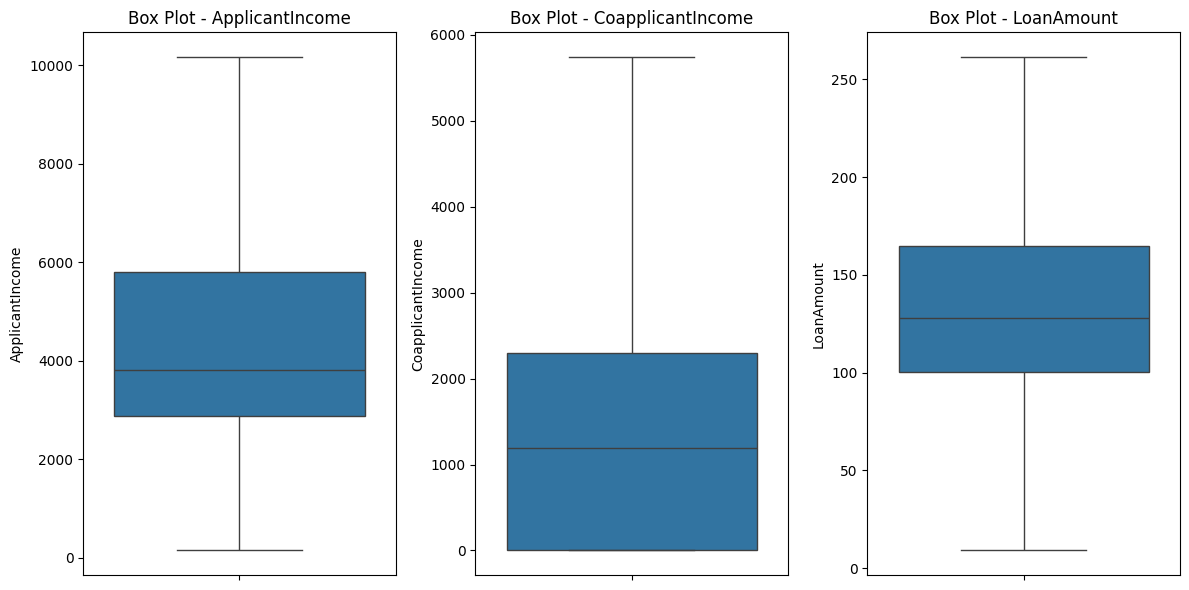

In [209]:
# Function to handle outliers by clipping them to the whiskers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Handle outliers in ApplicantIncome, CoapplicantIncome, and LoanAmount for train dataset
train = handle_outliers(train, 'ApplicantIncome')
train = handle_outliers(train, 'CoapplicantIncome')
train = handle_outliers(train, 'LoanAmount')
plt.figure(figsize=(12, 6))

# Box plot for ApplicantIncome
plt.subplot(1, 3, 1)
sns.boxplot(y=train['ApplicantIncome'])
plt.title('Box Plot - ApplicantIncome')

# Box plot for CoapplicantIncome
plt.subplot(1, 3, 2)
sns.boxplot(y=train['CoapplicantIncome'])
plt.title('Box Plot - CoapplicantIncome')

# Box plot for LoanAmount
plt.subplot(1, 3, 3)
sns.boxplot(y=train['LoanAmount'])
plt.title('Box Plot - LoanAmount')

plt.tight_layout()
plt.show()

We will do the similar changes to the test file simultaneously

In [210]:
# Handle outliers in ApplicantIncome, CoapplicantIncome, and LoanAmount for test dataset
test = handle_outliers(test, 'ApplicantIncome')
test = handle_outliers(test, 'CoapplicantIncome')
test = handle_outliers(test, 'LoanAmount')

## **Data Preparation**

### **Seperate the Target Variable**

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [211]:
# Drop the Loan_ID variable from both datasets
train = train.drop(columns=['Loan_ID'], axis=1)
test = test.drop(columns=['Loan_ID'], axis=1)

We'll utilize scikit-learn (sklearn) to create various models. Scikit-learn is an open-source library for Python, renowned for its efficiency. It includes numerous built-in functions that are highly useful for modeling in Python.
Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.


In [212]:
# Separate the target variable
y = train['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)
X = train.drop(columns=['Loan_Status'])

### **Encoding Categorical Variables**

Convert categorical variables into numerical format using techniques such as one-hot encoding. Dummy variables transform categorical variables into a series of 0s and 1s, simplifying their quantification and comparison. Let's delve into the process of creating dummy variables:

Take the Gender variable, for instance, which has two categories: Male and Female. Since logistic regression requires numerical inputs, we must convert these categories into numerical values. By applying dummy variables to the Gender variable, it will be split into two new variables (Gender_Male and Gender_Female), each representing one of the original categories. Gender_Male will be 0 if the individual is Female and 1 if the individual is Male.

In [214]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Encoding categorical variables for both train and test datasets
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
test_encoded = pd.get_dummies(test, columns=categorical_columns, drop_first=True)

Ensuring that the train and test datasets have the same columns after encoding is crucial. Machine learning models require the same feature set for training and testing to make accurate predictions.

In [215]:
# Ensure the same columns in test dataset as in the train dataset
missing_cols = set(X_encoded.columns) - set(test_encoded.columns)
for c in missing_cols:
    test_encoded[c] = 0
test_encoded = test_encoded[X_encoded.columns]

### **Scaling Numerical Features**

In [216]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])
test_encoded[numerical_features] = scaler.transform(test_encoded[numerical_features])

### **Splitting the Data**


We will use the train_test_split function from sklearn to divide our encoded and scaled training dataset into training and validation sets. This will help us evaluate the performance of our model on unseen data before using the test set.

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


## **Building Model**

### **Trainning the Model**

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize the models
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)

# Train the models on the training data
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### **Cross Validation**

In [225]:
# Perform K-fold cross-validation
logreg_cv_scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')

print("Logistic Regression CV Accuracy: ", logreg_cv_scores.mean())
print("KNN CV Accuracy: ", knn_cv_scores.mean())
print("Decision Tree CV Accuracy: ", dt_cv_scores.mean())

Logistic Regression CV Accuracy:  0.8134551495016611
KNN CV Accuracy:  0.7273532668881505
Decision Tree CV Accuracy:  0.6970099667774086


Logistic Regression has the highest cross-validation accuracy, indicating it performs the best among the three models on average across different subsets of the training data.
*  Logistic Regression: Based on the highest cross-validation accuracy (0.813) and its confusion matrix, this model appears to be the most reliable among the three.
*  KNN: Has a decent cross-validation accuracy (0.727) but may have more false positives/negatives compared to Logistic Regression.
*  Decision Tree: Has the lowest cross-validation accuracy (0.697) and might be less reliable compared to the other two models.
If Logistic Regression continues to show superior performance based on both cross-validation and confusion matrix analysis, it would be the recommended model for your final prediction

### **Model Evaluation Metrics**

In [227]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



Logistic Regression Accuracy:  0.7837837837837838
Logistic Regression Precision:  0.7564102564102564
Logistic Regression Recall:  0.9833333333333333
Logistic Regression F1-Score:  0.8550724637681159
Logistic Regression AUC-ROC:  0.6993589743589743


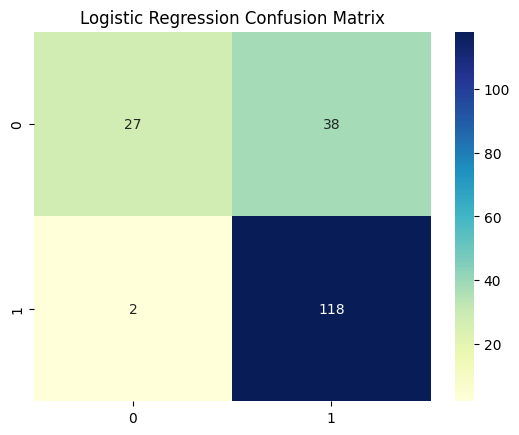

In [229]:
# Logistic Regression evaluation
y_pred_logreg = logreg.predict(X_val)
print("Logistic Regression Accuracy: ", accuracy_score(y_val, y_pred_logreg))
print("Logistic Regression Precision: ", precision_score(y_val, y_pred_logreg))
print("Logistic Regression Recall: ", recall_score(y_val, y_pred_logreg))
print("Logistic Regression F1-Score: ", f1_score(y_val, y_pred_logreg))
print("Logistic Regression AUC-ROC: ", roc_auc_score(y_val, y_pred_logreg))

# Confusion Matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_val, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


The Logistic Regression model shows a strong performance, especially in terms of recall and the F1-Score. The high recall ensures that most loan approvals are correctly identified, which is crucial for minimizing missed approvals. The precision and accuracy scores indicate a reliable performance but also highlight areas for potential improvement. The AUC-ROC score, while decent, suggests that further refinement and possibly the integration of additional features or different modeling techniques could improve the model's ability to differentiate between approved and non-approved loans.

KNN Accuracy:  0.6810810810810811
KNN Precision:  0.6918238993710691
KNN Recall:  0.9166666666666666
KNN F1-Score:  0.7885304659498207
KNN AUC-ROC:  0.5814102564102563


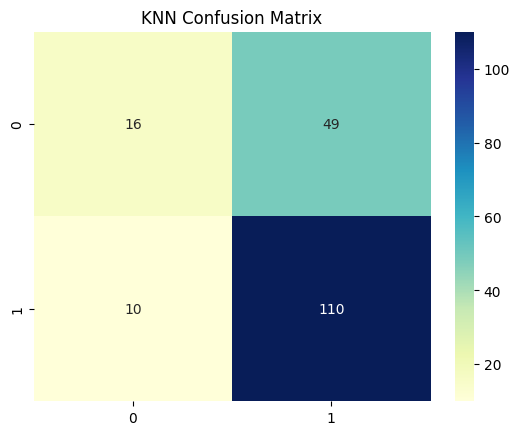

In [230]:
# KNN evaluation
y_pred_knn = knn.predict(X_val)
print("KNN Accuracy: ", accuracy_score(y_val, y_pred_knn))
print("KNN Precision: ", precision_score(y_val, y_pred_knn))
print("KNN Recall: ", recall_score(y_val, y_pred_knn))
print("KNN F1-Score: ", f1_score(y_val, y_pred_knn))
print("KNN AUC-ROC: ", roc_auc_score(y_val, y_pred_knn))

# Confusion Matrix for KNN
conf_matrix_knn = confusion_matrix(y_val, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="YlGnBu")
plt.title("KNN Confusion Matrix")
plt.show()


KNN model shows a reasonable performance but falls short compared to the Logistic Regression model. The KNN model has a high recall, which ensures that most loan approvals are correctly identified, but this comes at the cost of lower precision and overall accuracy. The lower AUC-ROC score further indicates that the KNN model is less effective in distinguishing between approved and non-approved loans.

Decision Tree Accuracy:  0.6756756756756757
Decision Tree Precision:  0.734375
Decision Tree Recall:  0.7833333333333333
Decision Tree F1-Score:  0.7580645161290323
Decision Tree AUC-ROC:  0.6301282051282051


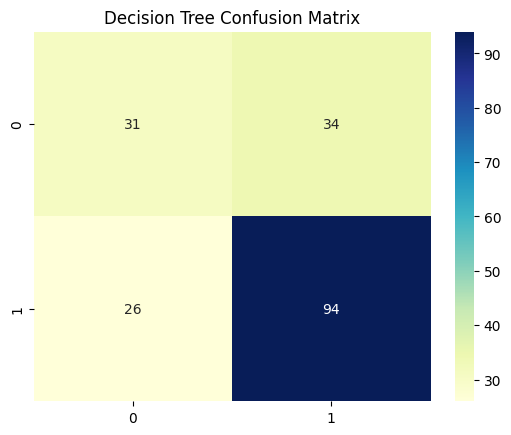

In [231]:
# Decision Tree evaluation
y_pred_dt = dt.predict(X_val)
print("Decision Tree Accuracy: ", accuracy_score(y_val, y_pred_dt))
print("Decision Tree Precision: ", precision_score(y_val, y_pred_dt))
print("Decision Tree Recall: ", recall_score(y_val, y_pred_dt))
print("Decision Tree F1-Score: ", f1_score(y_val, y_pred_dt))
print("Decision Tree AUC-ROC: ", roc_auc_score(y_val, y_pred_dt))

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Decision Tree Confusion Matrix")
plt.show()

By visualizing the confusion matrices, you can compare how each model performs in terms of TP, TN, FP, and FN. This comparison helps identify which model is better at distinguishing between the positive and negative classes.